In [1]:
import spacy
from spacy_layout import spaCyLayout
from pipeline_merge_pdf import process_pdf_folder
import os
import time

#Ordner, in dem PDFs liegen
#pdf_folder = "../data/DSA/Der_blaue_Bruder"
pdf_folder = "../data/DSA/Adel_Recht_und_Edelmut"
merged_pdf_path = os.path.join(pdf_folder, "_combined.pdf")

#Prüfen ob eine merged-Datei bereits vorhanden ist. Falls nicht, diese erzeugen
if os.path.exists(merged_pdf_path):
    print("Die Datei _combined.pdf existiert bereits unter folgendem Pfad:",merged_pdf_path)
    print("Lade die Datei lokal..\n")
    time.sleep(0.5)
    nlp = spacy.blank("de")
    layout = spaCyLayout(nlp)
    doc = layout(merged_pdf_path)
else:
    print("Die Datei _combined.pdf existiert noch nicht. Merge-Pipeline wird durchgeführt..")
    time.sleep(0.5)
    #Pipeline ausführen
    doc = process_pdf_folder(pdf_folder)

#spaCy-Doc
print("\nAnzahl Layout-Spans:", len(doc.spans["layout"]))


/home/timc/Workspace/nlp-rpg-narratives/nlp-rpg-venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Die Datei _combined.pdf existiert bereits unter folgendem Pfad: ../data/DSA/Adel_Recht_und_Edelmut/_combined.pdf
Lade die Datei lokal..



2025-12-03 23:45:54,439 - INFO - detected formats: [<InputFormat.PDF: 'pdf'>]
2025-12-03 23:45:54,462 - INFO - Going to convert document batch...
2025-12-03 23:45:54,463 - INFO - Initializing pipeline for StandardPdfPipeline with options hash f9730ffaa6e7f8d4fb0c98c8df3f18cb
2025-12-03 23:45:54,469 - INFO - Loading plugin 'docling_defaults'
2025-12-03 23:45:54,470 - INFO - Registered picture descriptions: ['vlm', 'api']
2025-12-03 23:45:54,474 - INFO - Loading plugin 'docling_defaults'
2025-12-03 23:45:54,476 - INFO - Registered ocr engines: ['auto', 'easyocr', 'ocrmac', 'rapidocr', 'tesserocr', 'tesseract']
2025-12-03 23:45:54,476 - INFO - rapidocr cannot be used because onnxruntime is not installed.
2025-12-03 23:45:54,477 - INFO - easyocr cannot be used because it is not installed.
2025-12-03 23:45:54,539 - INFO - Accelerator device: 'cuda:0'
[INFO] 2025-12-03 23:45:54,553 [RapidOCR] base.py:22: Using engine_name: torch
[INFO] 2025-12-03 23:45:54,559 [RapidOCR] download_file.py:60: 


Anzahl Layout-Spans: 906


In [2]:
from pipeline_preproc_pdf import process_doc_into_posts 

#Posts extrahieren + bereinigen
posts = process_doc_into_posts(doc)

#Posts ausgeben
for i, p in enumerate(posts):
    print(f"--- Post {i+1} ---\n{p}\n")

--- Post 1 ---
Wir schreiben das Jahr 1037 BF, Peraine ist gegangen und die ersten wärmenden  Strahlen der Praiosscheibe des Ingerimm haben ein wohliges Gefühl auf eurer Haut hinterlassen. So ist die herannahende Dunkelheit und die damit noch einhergehende Kälte nichts, was Elf, Mensch oder Zwerg in den  Ausläufern des Finterkamms über Nacht draußen sein läßt. Zudem  dunkle Wolken über  den noch immer  schneebedeckten Gipfeln des Gebirges im Nordwesten hängen, wie unheilige Vorboten einer herannahenden Bedrohung. Immer  wieder  dringen dunkle Gelichter von den Hängen der schroffen Berge hinab in die Finsterwacht: jene westlichen Ländereien der  Markgraftschaft Greifenfurt und des Herzogtums  Weiden, die als Schild des Reiches über die Provinzen des Mittelreiches wachen. Immer  wieder  stoßen Orks in die von vielen Kämpfen gebeutelten Provinzen vor, aber  auch Raubritter und Strauchdiebe treiben in den Wäldern am  Fuße der Berge ihr Unwesen. Hier weiß  jeder Reisende, dass es besser ist

In [3]:
from pipeline_preproc_lemma import TextPreprocessingPipeline #Posts von Satzzeichen und Ziffern bereinigen & anschließend lemmatisieren 

pipeline = TextPreprocessingPipeline()
posts_clean = pipeline.process_posts(posts, debug=False) #debug für print-Ausgaben der Zwischenschritte

#Posts ausgeben
for i, p in enumerate(posts_clean):
    print(f"--- Post {i+1} ---\n{p}\n")

Lade spaCy-Modell ...
--- Post 1 ---
wir schreiben der jahr bf peraine sein gehen und der erster wärmend strahle der praiosscheibe der ingerimm haben ein wohlig gefühl auf eurer haut hinterlassen so sein der herannahend dunkelheit und der damit noch einhergehend kälte nichts was elf mensch oder zwerg in der ausläufer der finterkamm über nacht draußen sein lassen zudem dunkel wolke über der noch immer schneebedeckt gipfel der gebirg in nordwesten hängen wie unheilig vorbote ein herannahend bedrohung immer wieder dring dunkel gelichter von der hängen der schroff berg hinab in der finsterwacht jener westlich ländereie der markgraftschaft greifenfurt und der herzogtums weiden der als schild der reich über der provinz der mittelreich wachen immer wieder stoßen orks in der von vieler kämpfen gebeutelt provinz vor aber auch raubritter und strauchdiebe treiben in der wäldern an fuß der berg ihr unwesen hier wissen jeder reisende dass es gut sein nicht allein unterwegs zu sein so sein schon sei

## EXKURS - START

In [ ]:
from pipeline_pos_verbs import VerbExtractionPipeline #pos-tagging

pipeline = VerbExtractionPipeline()

verb_only_posts = pipeline.process_posts(posts_clean, debug=False)

#Posts ausgeben
for i, p in enumerate(verb_only_posts):
    print(f"--- Post {i+1} ---\n{p}\n")


Lade spaCy-Modell für Verbextraktion ...
--- Post 1 ---
schreiben peraine gehen haben hinterlassen kälte sein lassen hängen vorbote dring wachen stoßen gebeutelt treiben wissen sein sein sein bolgrim zusammenführen haben sein bestimmen treffen entscheiden sein elfen haben wissen sagen zuneigt kommen buchen treiben gasthaus wirken glauben mögen sein haben begleiten ziehen auftauchen hören buchen sein umgeben durchbrochen werden

--- Post 2 ---
haben meinen sein sein sein auffallen erblicken können glauben sein geben schützen scheinen schütteln treten gepflastert sein treten schauen fragen

--- Post 3 ---
sehen können sein trio sein befinden wedeln werden wollen blicken sein stehen können vernehmen bolgrim anbieten kochen haben widersetzen richten greifen brauchsten erinnern bieten danken reichen drehen suchen wedeln hinzusetzen sehen halten blicken vernehmen nickt widmen klingen liegen

--- Post 4 ---
scheinen denken sehen machen bolgrim schenken widersetzen murmelen zubewegen rollt sin

## EXKURS - ENDE

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
result = tfidf.fit_transform(posts_clean)

In [11]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

german_stopwords = stopwords.words('german') #Stopwords aus NLTK laden

newwords = ["bf", "peraine", "bolgrim", "aleezikiel"]
german_stopwords.extend(newwords)

print(german_stopwords)

tfidf = TfidfVectorizer(stop_words=german_stopwords, max_df=0.95, min_df=1)
result = tfidf.fit_transform(verb_only_posts)


['aber', 'alle', 'allem', 'allen', 'aller', 'alles', 'als', 'also', 'am', 'an', 'ander', 'andere', 'anderem', 'anderen', 'anderer', 'anderes', 'anderm', 'andern', 'anderr', 'anders', 'auch', 'auf', 'aus', 'bei', 'bin', 'bis', 'bist', 'da', 'damit', 'dann', 'der', 'den', 'des', 'dem', 'die', 'das', 'dass', 'daß', 'derselbe', 'derselben', 'denselben', 'desselben', 'demselben', 'dieselbe', 'dieselben', 'dasselbe', 'dazu', 'dein', 'deine', 'deinem', 'deinen', 'deiner', 'deines', 'denn', 'derer', 'dessen', 'dich', 'dir', 'du', 'dies', 'diese', 'diesem', 'diesen', 'dieser', 'dieses', 'doch', 'dort', 'durch', 'ein', 'eine', 'einem', 'einen', 'einer', 'eines', 'einig', 'einige', 'einigem', 'einigen', 'einiger', 'einiges', 'einmal', 'er', 'ihn', 'ihm', 'es', 'etwas', 'euer', 'eure', 'eurem', 'euren', 'eurer', 'eures', 'für', 'gegen', 'gewesen', 'hab', 'habe', 'haben', 'hat', 'hatte', 'hatten', 'hier', 'hin', 'hinter', 'ich', 'mich', 'mir', 'ihr', 'ihre', 'ihrem', 'ihren', 'ihrer', 'ihres', 'euc

[nltk_data] Downloading package stopwords to /home/timc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import pandas as pd

words = tfidf.get_feature_names_out()
df = pd.DataFrame(result.toarray(), columns=words)
print(df)

     abbringen  abgeschaut  abgestanden  abgewinnen  abhalten  abhang  \
0          0.0         0.0          0.0         0.0       0.0     0.0   
1          0.0         0.0          0.0         0.0       0.0     0.0   
2          0.0         0.0          0.0         0.0       0.0     0.0   
3          0.0         0.0          0.0         0.0       0.0     0.0   
4          0.0         0.0          0.0         0.0       0.0     0.0   
..         ...         ...          ...         ...       ...     ...   
173        0.0         0.0          0.0         0.0       0.0     0.0   
174        0.0         0.0          0.0         0.0       0.0     0.0   
175        0.0         0.0          0.0         0.0       0.0     0.0   
176        0.0         0.0          0.0         0.0       0.0     0.0   
177        0.0         0.0          0.0         0.0       0.0     0.0   

     abnehmen  abschirmen  abschneiden  absehen  ...  überantworten  \
0         0.0         0.0          0.0      0.0  ...

In [17]:
for i, doc in enumerate(verb_only_posts):
    print(f"\n--- Wichtigste Wörter in Post {i+1} ---")
    row = df.iloc[i]
    print(row.sort_values(ascending=False).head(7))



--- Wichtigste Wörter in Post 1 ---
buchen            0.349059
treiben           0.314020
wissen            0.218928
umgeben           0.188436
zuneigt           0.188436
gebeutelt         0.188436
zusammenführen    0.188436
Name: 0, dtype: float64

--- Wichtigste Wörter in Post 2 ---
treten         0.524795
schützen       0.350948
gepflastert    0.350948
auffallen      0.306673
erblicken      0.292419
schütteln      0.280773
glauben        0.248144
Name: 1, dtype: float64

--- Wichtigste Wörter in Post 3 ---
wedeln         0.409110
vernehmen      0.357497
blicken        0.227249
danken         0.204555
brauchsten     0.204555
kochen         0.204555
hinzusetzen    0.204555
Name: 2, dtype: float64

--- Wichtigste Wörter in Post 4 ---
erklimmen      0.25619
rollt          0.25619
brummen        0.25619
zubewegen      0.25619
überschauen    0.25619
sinnieren      0.25619
ohrfeigen      0.25619
Name: 3, dtype: float64

--- Wichtigste Wörter in Post 5 ---
weiß         0.409615
schlagen   

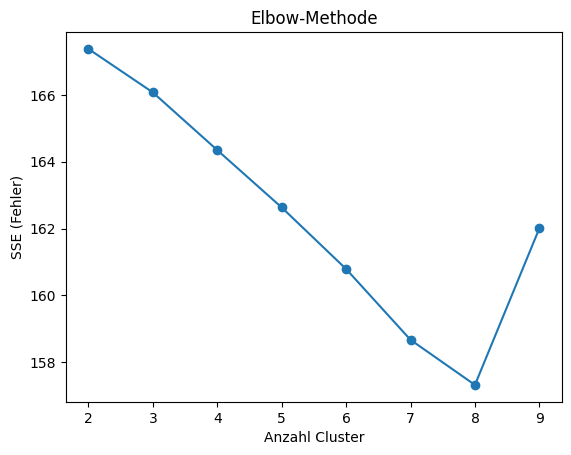

In [ ]:
#Wie viele Cluster sind sinnvoll? (Elbow-Methode)
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

sse = []
K = range(2, 10)  # teste 2-9 Cluster

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(result)
    sse.append(km.inertia_)

plt.plot(K, sse, '-o')
plt.xlabel("Anzahl Cluster")
plt.ylabel("SSE (Fehler)")
plt.title("Elbow-Methode")
plt.show()

In [18]:
#Clustering mittels k-means
from sklearn.cluster import KMeans

#KMeans Clustering
k = 7  # Anzahl Cluster
model = KMeans(n_clusters=k, random_state=42)
model.fit(result)

#Cluster-Zuordnung pro Dokument
labels = model.labels_

for i, (doc, label) in enumerate(zip(verb_only_posts, labels)):
    print(f"[Cluster {label}] {doc}")

[Cluster 5] schreiben peraine gehen haben hinterlassen kälte sein lassen hängen vorbote dring wachen stoßen gebeutelt treiben wissen sein sein sein bolgrim zusammenführen haben sein bestimmen treffen entscheiden sein elfen haben wissen sagen zuneigt kommen buchen treiben gasthaus wirken glauben mögen sein haben begleiten ziehen auftauchen hören buchen sein umgeben durchbrochen werden
[Cluster 3] haben meinen sein sein sein auffallen erblicken können glauben sein geben schützen scheinen schütteln treten gepflastert sein treten schauen fragen
[Cluster 5] sehen können sein trio sein befinden wedeln werden wollen blicken sein stehen können vernehmen bolgrim anbieten kochen haben widersetzen richten greifen brauchsten erinnern bieten danken reichen drehen suchen wedeln hinzusetzen sehen halten blicken vernehmen nickt widmen klingen liegen
[Cluster 5] scheinen denken sehen machen bolgrim schenken widersetzen murmelen zubewegen rollt sinnieren können ohrfeigen werden brummen entscheiden anseh

In [19]:
#Welche Wörter charakterisieren jedes Cluster?
import numpy as np

words = tfidf.get_feature_names_out()
centers = model.cluster_centers_

for i in range(k):
    print(f"\nTop-Wörter Cluster {i}:")
    top_indices = centers[i].argsort()[::-1][:10]  #10 wichtigste Wörter
    print([words[idx] for idx in top_indices])


Top-Wörter Cluster 0:
['folgen', 'finden', 'verlieren', 'nehmen', 'lassen', 'zoltan', 'warten', 'führen', 'schauen', 'blenden']

Top-Wörter Cluster 1:
['gehen', 'hilgeren', 'scheinen', 'geben', 'ziehen', 'bemerken', 'blicken', 'verstehen', 'treten', 'trinken']

Top-Wörter Cluster 2:
['sprechen', 'müssen', 'bringen', 'vorstellen', 'befestigen', 'klettern', 'feststellen', 'bewege', 'herausfinden', 'berichten']

Top-Wörter Cluster 3:
['hören', 'sehen', 'kommen', 'scheinen', 'bemerken', 'erinnern', 'hilgeren', 'auffallen', 'zoltan', 'ausmachen']

Top-Wörter Cluster 4:
['nickt', 'gehören', 'wirken', 'beginnen', 'schließen', 'spinnen', 'versuchen', 'nehmen', 'stecken', 'drehen']

Top-Wörter Cluster 5:
['denken', 'blicken', 'wenden', 'sollen', 'kommen', 'wissen', 'geben', 'sehen', 'sagen', 'lassen']

Top-Wörter Cluster 6:
['schauen', 'hilgeren', 'halten', 'flüstern', 'greifen', 'füllen', 'entzünden', 'kennen', 'sagen', 'sollen']


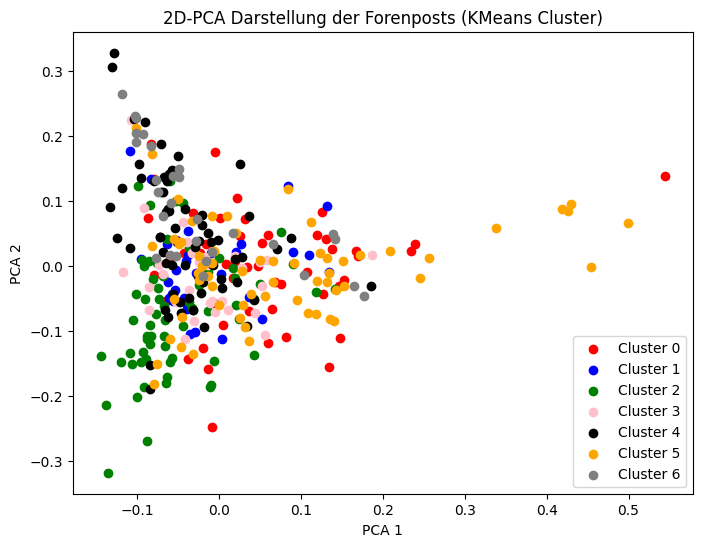

In [175]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# PCA zur 2D-Visualisierung
pca = PCA(n_components=2)
tfidf_2d = pca.fit_transform(result.toarray())

# Cluster-Farben
colors = ['red', 'blue', 'green', 'pink', 'black', 'orange', 'grey'] #, 'black', 'orange', 'grey'

plt.figure(figsize=(8, 6))
for i in range(k):
    points = tfidf_2d[labels == i]
    plt.scatter(points[:, 0], points[:, 1], c=colors[i], label=f"Cluster {i}")

plt.title("2D-PCA Darstellung der Forenposts (KMeans Cluster)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()


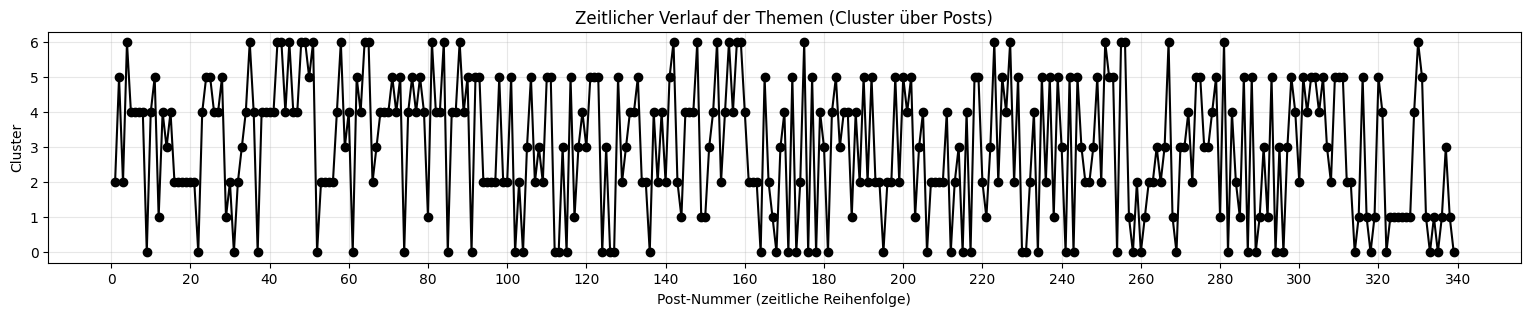

In [170]:
import matplotlib.ticker as ticker

plt.figure(figsize=(19, 3))
plt.plot(range(1, len(labels)+1), labels, marker='o', linestyle='-', color='black')

# Maximal 20 Ticks auf der X-Achse
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=20))

plt.yticks(sorted(set(labels)))
plt.xlabel("Post-Nummer (zeitliche Reihenfolge)")
plt.ylabel("Cluster")
plt.title("Zeitlicher Verlauf der Themen (Cluster über Posts)")

plt.grid(True, alpha=0.3)
plt.show()


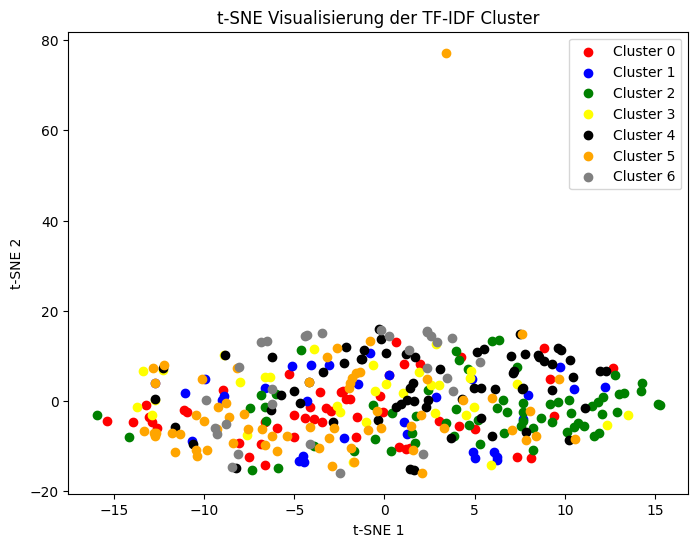

In [157]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# t-SNE erzeugen (2 Dimensionen)
tsne = TSNE(n_components=2, random_state=42, perplexity=50)
tfidf_tsne = tsne.fit_transform(result.toarray())

# Plot
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', "yellow", 'black', 'orange', 'grey']

for i in range(k):
    pts = tfidf_tsne[labels == i]
    plt.scatter(pts[:, 0], pts[:, 1], c=colors[i], label=f"Cluster {i}")

plt.title("t-SNE Visualisierung der TF-IDF Cluster")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend()
plt.show()


/home/timc/Workspace/nlp-rpg-narratives/nlp-rpg-venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


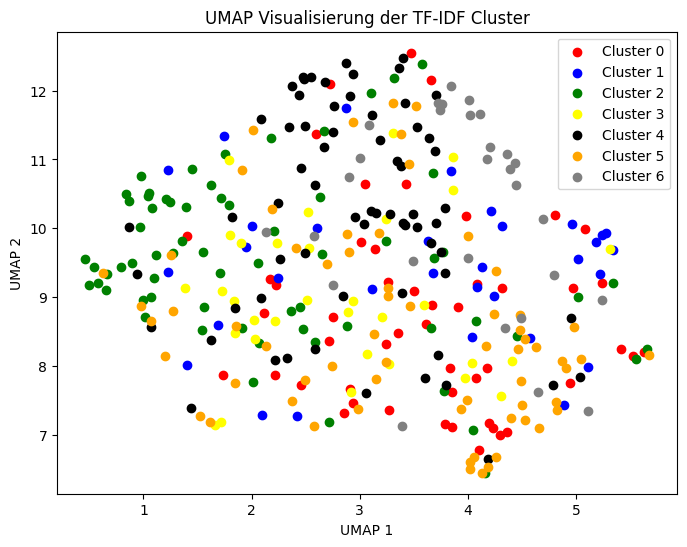

In [158]:
import umap
import matplotlib.pyplot as plt

# UMAP erzeugen
umap_model = umap.UMAP(n_components=2, random_state=42)
tfidf_umap = umap_model.fit_transform(result.toarray())

# Plot
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'yellow', 'black', 'orange', 'grey']

for i in range(k):
    pts = tfidf_umap[labels == i]
    plt.scatter(pts[:, 0], pts[:, 1], c=colors[i], label=f"Cluster {i}")

plt.title("UMAP Visualisierung der TF-IDF Cluster")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.legend()
plt.show()


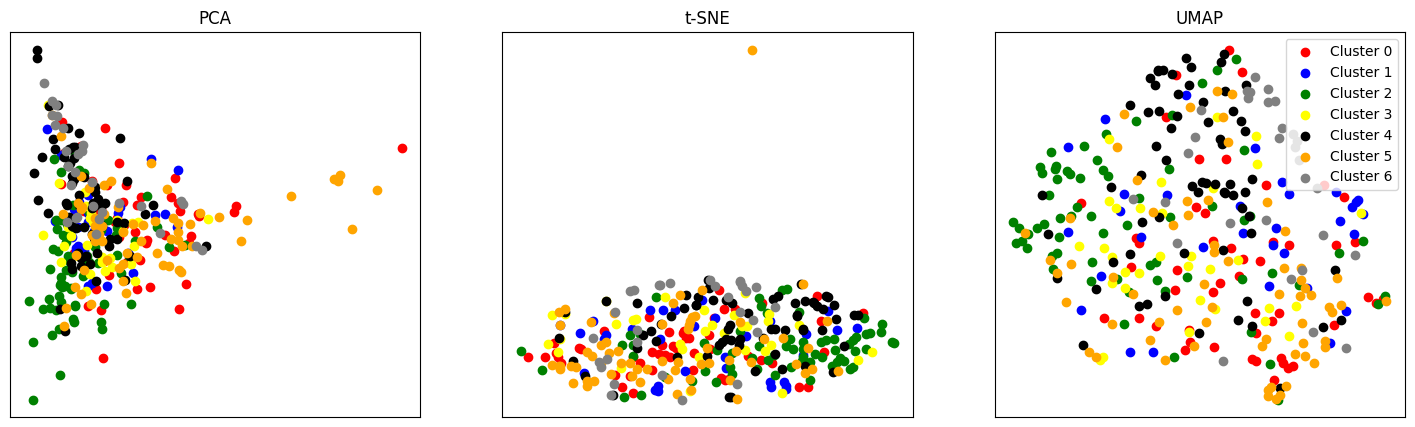

In [173]:
# PCA zur 2D-Visualisierung
pca = PCA(n_components=2)
tfidf_2d = pca.fit_transform(result.toarray())

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

methods = {
    "PCA": tfidf_2d,
    "t-SNE": tfidf_tsne,
    "UMAP": tfidf_umap
}

for ax, (name, emb) in zip(axs, methods.items()):
    for i in range(k):
        pts = emb[labels == i]
        ax.scatter(pts[:, 0], pts[:, 1], c=colors[i], label=f"Cluster {i}")
    ax.set_title(name)
    ax.set_xticks([])
    ax.set_yticks([])

plt.legend()
plt.show()


/home/timc/Workspace/nlp-rpg-narratives/nlp-rpg-venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


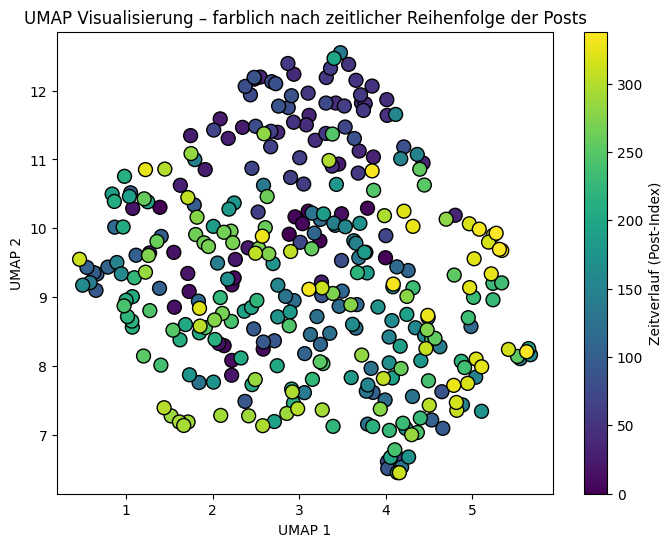

In [160]:
import umap
import matplotlib.pyplot as plt
import numpy as np

# UMAP berechnen (2D)
umap_model = umap.UMAP(n_components=2, random_state=42)
tfidf_umap = umap_model.fit_transform(result.toarray())

# Zeitindex = einfach die Reihenfolge 0,1,2,... der Dokumente
time_index = np.arange(len(posts))

plt.figure(figsize=(8, 6))

# Scatterplot: Farbe = Zeitverlauf
scatter = plt.scatter(
    tfidf_umap[:, 0],
    tfidf_umap[:, 1],
    c=time_index,
    cmap="viridis",
    s=100,
    edgecolors='black'
)

plt.colorbar(scatter, label="Zeitverlauf (Post-Index)")
plt.title("UMAP Visualisierung – farblich nach zeitlicher Reihenfolge der Posts")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")

plt.show()


In [166]:
import umap
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# ----------------------------
#  1. UMAP berechnen
# ----------------------------
umap_model = umap.UMAP(n_components=2, random_state=42)
tfidf_umap = umap_model.fit_transform(result.toarray())

# Zeitindex = Reihenfolge der Posts
time_index = np.arange(len(posts))

# ----------------------------
#  2. Animation vorbereiten
# ----------------------------
fig, ax = plt.subplots(figsize=(8, 6))

# Hintergrundpunkte anzeigen
ax.scatter(tfidf_umap[:, 0], tfidf_umap[:, 1], c='lightgray', s=50)

# Animierter Scatterplot (startet leer)
scatter = ax.scatter(
    [], [],
    c=[],                     # Farben werden dynamisch gesetzt
    cmap="viridis",
    s=120,
    edgecolors="black",
    vmin=time_index.min(),
    vmax=time_index.max()
)

ax.set_title("UMAP – Animierter zeitlicher Verlauf der Forenposts")
ax.set_xlabel("UMAP 1")
ax.set_ylabel("UMAP 2")

# ----------------------------
#  3. Update-Funktion
# ----------------------------
def update(frame):
    # Werte bis zum aktuellen Frame anzeigen
    current_x = tfidf_umap[:frame+1, 0]
    current_y = tfidf_umap[:frame+1, 1]

    scatter.set_offsets(np.c_[current_x, current_y])
    scatter.set_array(time_index[:frame+1])  # Farben nach Zeitverlauf

    return scatter,

# ----------------------------
#  4. Animation erzeugen
# ----------------------------
ani = animation.FuncAnimation(
    fig,
    update,
    frames=len(posts),
    interval=800,
    repeat=False
)

# ----------------------------
#  5. Export als GIF
# ----------------------------
ani.save(
    "umap_timeline.gif",
    writer="imagemagick",
    dpi=120
)

# ----------------------------
#  6. Export als MP4
# ----------------------------
ani.save(
    "umap_timeline.mp4",
    writer="ffmpeg",
    fps=1   # 1 Frame pro Sekunde → 800ms wie Animation
)

plt.close(fig)   # Fenster schließen nach Export

print("GIF und MP4 erfolgreich gespeichert!")


/home/timc/Workspace/nlp-rpg-narratives/nlp-rpg-venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/timc/Workspace/nlp-rpg-narratives/nlp-rpg-venv/lib/python3.13/site-packages/matplotlib/animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(
2025-11-27 21:23:39,810 - WARNING - MovieWriter imagemagick unavailable; using Pillow instead.
2025-11-27 21:23:39,811 - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>
2025-11-27 21:23:56,655 - INFO - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2025-11-27 21:23:56,656 - INFO - MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 800x600 -pix_fmt rg

GIF und MP4 erfolgreich gespeichert!


_________________________

# tf-idf auf pos-tags

In [2]:
import spacy
from spacy_layout import spaCyLayout
from pipeline_merge_pdf import process_pdf_folder
import os
import time

#Ordner, in dem PDFs liegen
pdf_folder = "../data/DSA/Der_blaue_Bruder"
#pdf_folder = "../data/DSA/Die_Stadt_des_Feuers"
merged_pdf_path = os.path.join(pdf_folder, "_combined.pdf")

#Prüfen ob eine merged-Datei bereits vorhanden ist. Falls nicht, diese erzeugen
if os.path.exists(merged_pdf_path):
    print("Die Datei _combined.pdf existiert bereits unter folgendem Pfad:",merged_pdf_path)
    print("Lade die Datei lokal..\n")
    time.sleep(0.5)
    nlp = spacy.blank("de")
    layout = spaCyLayout(nlp)
    doc = layout(merged_pdf_path)
else:
    print("Die Datei _combined.pdf existiert noch nicht. Merge-Pipeline wird durchgeführt..")
    time.sleep(0.5)
    #Pipeline ausführen
    doc = process_pdf_folder(pdf_folder)

#spaCy-Doc
print("\nAnzahl Layout-Spans:", len(doc.spans["layout"]))

Die Datei _combined.pdf existiert bereits unter folgendem Pfad: ../data/DSA/Der_blaue_Bruder/_combined.pdf
Lade die Datei lokal..



2025-11-28 13:14:49,614 - INFO - detected formats: [<InputFormat.PDF: 'pdf'>]
2025-11-28 13:14:49,632 - INFO - Going to convert document batch...
2025-11-28 13:14:49,633 - INFO - Initializing pipeline for StandardPdfPipeline with options hash f9730ffaa6e7f8d4fb0c98c8df3f18cb
2025-11-28 13:14:49,634 - INFO - rapidocr cannot be used because onnxruntime is not installed.
2025-11-28 13:14:49,636 - INFO - easyocr cannot be used because it is not installed.
2025-11-28 13:14:49,638 - INFO - Accelerator device: 'cuda:0'
[INFO] 2025-11-28 13:14:49,650 [RapidOCR] base.py:22: Using engine_name: torch
[INFO] 2025-11-28 13:14:49,656 [RapidOCR] download_file.py:60: File exists and is valid: /home/timc/Workspace/nlp-rpg-narratives/nlp-rpg-venv/lib/python3.13/site-packages/rapidocr/models/ch_PP-OCRv4_det_infer.pth
[INFO] 2025-11-28 13:14:49,656 [RapidOCR] torch.py:54: Using /home/timc/Workspace/nlp-rpg-narratives/nlp-rpg-venv/lib/python3.13/site-packages/rapidocr/models/ch_PP-OCRv4_det_infer.pth
[INFO


Anzahl Layout-Spans: 1833


In [3]:
from pipeline_preproc_pdf import process_doc_into_posts

#Posts extrahieren + bereinigen
posts = process_doc_into_posts(doc)

#Posts ausgeben
for i, p in enumerate(posts):
    print(f"--- Post {i+1} ---\n{p}\n")

--- Post 1 ---
Die Grafschaft Heldentrutz zwischen Finsterkamm und Finsterbach ist eine der ärmsten und wildesten Regionen Weidens. Sie wird von zahlreichen dichten und gefährlichen Wäldern, mit Harpyien, Orks und Drachen, urwüchsigen Wiesen sowie von Heide- und Moorlandschaften geprägt. Neben ein wenig Kornwirtschaft betreiben die Leute vor allem Kohl- und Rübenanbau, sowie Viehwirtschaft, vor allem Schafe und Ziegen. Einzige  Ausnahme  in der ganzen Ärmlichkeit ist die Baronie Nordhag mit der gleichnamigen Stadt, die durch die dort vorhandenen Salzvorkommen zu Reichtum gekommen  ist.  Nordhag bildet das wirtschaftliche und kulturelle Zentrum der Grafschaft, liegt an wichtigen Handelswegen (Norrnstieg, Alter Weg,  Alte Straße), richtet zweimal  im Jahr den großen Wollmarkt aus und ist durch die Feste Norrbrug ganz gut geschützt. Am 10. Efferd des Jahres 1040 BF, zur Zeit des zweiten Wollmarktes leben in Nordhag um  die 900 Einwohner, man  findet dort Tempel  von Rondra, Phex, Peraine 

In [4]:
import spacy
from spacy.matcher import Matcher

nlp = spacy.load("de_core_news_lg")

reise_patterns = [
    # wanderte, wanderten, wanderst, wandert, etc.
    [{"LOWER": {"REGEX": "^wander"} , "POS": "VERB"}],

    # Lemma: reisen, ziehen, marschieren, durchqueren
    [{"LEMMA": {"IN": ["erreichen","reisen","ziehen","marschieren","durchqueren"]}, "POS": "VERB"}],

    # trennbares aufbrechen → brach ... auf
    [{"LEMMA": "brechen", "POS": "VERB"}, {"LOWER": "auf"}],

    # Nomen
    [{"LEMMA": {"IN": ["reise","weg","pfad","expedition","marsch"]}, "POS": "NOUN"}],
]

kampf_patterns = [
    [{"LEMMA": {"IN": ["kämpfen","angreifen","verteidigen","zuschlagen","stechen"]}, "POS": "VERB"}],
    [{"LEMMA": {"IN": ["kampf","angriff","duell","schlacht","gegner","feind"]}, "POS": "NOUN"}]
]

ausruhen_patterns = [
    # ruhten
    [{"LEMMA": {"IN": ["ruhen","rasten","schlafen","lagern","entspannen"]}, "POS": "VERB"}],
    
    # ruhten ... aus  (trennbar!)
    [{"LEMMA": "ruhen"}, {"LOWER": "aus"}],

    # Nomen
    [{"LEMMA": {"IN": ["rast","pause","lager","ruhe","erholung"]}, "POS": "NOUN"}]
]

rettung_patterns = [
    [{"LEMMA": {"IN": ["retten","befreien","beschützen","opfern"]}, "POS": "VERB"}],
    [{"LOWER": {"IN": ["rettung","hilferuf","opfer","heldentat","gefahr","bedrohung"]}, "POS": "NOUN"}]
]

flucht_patterns = [
    # fliehen, entkommen, flüchten
    [{"LEMMA": {"IN": ["fliehen","entkommen","flüchten","verstecken"]}, "POS": "VERB"}],

    # trennbares wegrennen / rannte ... weg
    [{"LEMMA": "rennen", "POS": "VERB"}, {"LOWER": "weg"}],
    [{"LOWER": "weg"}, {"LEMMA": "rennen"}],

    [{"LEMMA": {"IN": ["flucht","unterschlupf","versteck","panik"]}, "POS": "NOUN"}]
]

training_patterns = [
    [{"LEMMA": {"IN": ["trainieren","üben","vorbereiten","meditieren"]}, "POS": "VERB"}],
    [{"LEMMA": {"IN": ["training","übung","vorbereitung","lektion","technik"]}, "POS": "NOUN"}]
]

verfolgung_patterns = [
    [{"LEMMA": {"IN": ["verfolgen","jagen","suchen"]}, "POS": "VERB"}],
    [{"LEMMA": "spüren", "POS": "VERB"}, {"LOWER": "auf"}],
    [{"LEMMA": {"IN": ["verfolgung","jagd","spur","fährte"]}, "POS": "NOUN"}]
]

ruf_patterns = [
    [{"LEMMA": {"IN": ["rufen","einladen","beauftragen","verkünden","offenbaren"]}, "POS": "VERB"}],
    [{"LEMMA": {"IN": ["ruf","auftrag","prophezeiung","vision","botschaft"]}, "POS": "NOUN"}]
]
belohnung_patterns = [
    [{"LEMMA": {"IN": ["belohnen","erkennen","verstehen","entdecken","gewinnen"]}, "POS": "VERB"}],
    [{"LEMMA": {"IN": ["belohnung","schatz","erkenntnis","wahrheit","einsicht"]}, "POS": "NOUN"}]
]

categories = {
    "Reise": reise_patterns,
    "Kampf": kampf_patterns,
    "Ausruhen": ausruhen_patterns,
    "Rettung": rettung_patterns,
    "Flucht": flucht_patterns,
    "Training": training_patterns,
    "Verfolgung": verfolgung_patterns,
    "Ruf": ruf_patterns,
    "Belohnung": belohnung_patterns
}

# Matcher erstellen
matcher = Matcher(nlp.vocab)

# Patterns dem Matcher hinzufügen
for label, patterns in categories.items():
    matcher.add(label, patterns)

for post in posts:
    doc = nlp(post)
    matches = matcher(doc)
    #print(matches)

    # Ergebniscontainer
    category_hits = {c: [] for c in categories}

    # Treffer zuordnen
    for match_id, start, end in matches:
        label = nlp.vocab.strings[match_id]
        span = doc[start:end]
        category_hits[label].append(span.text)

    # Ausgabe
    for cat, hits in category_hits.items():
        if hits:
            print(f"{cat}: {hits}")


Reise: ['ziehen', 'erreichte']
Verfolgung: ['verfolgte']
Verfolgung: ['suchen', 'sucht']
Belohnung: ['verstehen', 'erkennen']
Verfolgung: ['suchte']
Reise: ['erreicht']
Reise: ['erreichen']
Reise: ['gereist']
Reise: ['reisen']
Ausruhen: ['entspannt']
Ruf: ['ruft']
Verfolgung: ['suchen']
Belohnung: ['versteht']
Belohnung: ['verstehen']
Belohnung: ['verstehen']
Reise: ['reise']
Ausruhen: ['ruht']
Belohnung: ['versteht']
Verfolgung: ['suche']
Verfolgung: ['sucht']
Reise: ['zieht']
Belohnung: ['versteht']
Reise: ['gereist']
Reise: ['gereist']
Flucht: ['verstecken']
Reise: ['zieht']
Verfolgung: ['suche']
Rettung: ['Opfer']
Verfolgung: ['suchen']
Verfolgung: ['suchen']
Verfolgung: ['suchen']
Verfolgung: ['suchen']
Verfolgung: ['suchen']
Reise: ['zieht']
Verfolgung: ['sucht']
Belohnung: ['verstehen']
Belohnung: ['verstehe']
Reise: ['zieht', 'erreicht']
Reise: ['erreichen', 'erreichen']
Rettung: ['befreien']
Verfolgung: ['suchen']
Verfolgung: ['sucht']
Training: ['vorbereiten']
Belohnung: ['ve

In [5]:
for post in posts:
    doc = nlp(post)
    matches = matcher(doc)

    hits = []

    # Alle Treffer extrahieren
    for match_id, start, end in matches:
        span = doc[start:end]
        hits.append(span.text)

    # Ausgabe nur der Treffer
    if hits:
        print(hits)


['ziehen', 'verfolgte', 'erreichte']
['verstehen', 'erkennen', 'suchen', 'sucht']
['suchte']
['erreicht']
['erreichen']
['gereist']
['entspannt', 'reisen']
['ruft']
['versteht', 'suchen']
['verstehen']
['verstehen']
['reise']
['ruht']
['versteht']
['suche']
['sucht']
['versteht', 'zieht']
['gereist']
['verstecken', 'gereist']
['zieht']
['suche']
['Opfer']
['suchen']
['suchen']
['suchen']
['suchen']
['suchen']
['zieht']
['sucht']
['verstehen']
['verstehe']
['zieht', 'erreicht']
['befreien', 'erreichen', 'suchen', 'erreichen']
['sucht']
['vorbereiten']
['verstanden']
['verstehe']
['erreichte']
['suchen']
['erkennt']
['entdeckt', 'erkennen', 'erkennen']
['fliehen']
['zieht', 'erkennen', 'reist']
['erkennt']
['entdecken']
['suchen']
['suchen']
['entdeckt', 'erkannt', 'suchen', 'sucht', 'erkennen']
['vorbereitet', 'ziehen']
['erkennen', 'verkündet']
['entdecken']
['ziehen']
['entdeckt']
['gewonnen']
['verstand', 'erkennen']
['sucht']
['ziehen']
['suchen', 'zieht', 'erkennen']
['sucht']
['zi

In [7]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

german_stopwords = stopwords.words('german') #Stopwords aus NLTK laden

newwords = ["ja", "wurde", "wäre", "setzt", "mal", "habt", "12", "10", "100", "1000", "11", "00", "02", "053", "1012", "14", "15", "16", "20", "200"]
german_stopwords.extend(newwords)

print(german_stopwords)

tfidf = TfidfVectorizer(stop_words=german_stopwords, max_df=0.95, min_df=1)
result = tfidf.fit_transform(hits)

['aber', 'alle', 'allem', 'allen', 'aller', 'alles', 'als', 'also', 'am', 'an', 'ander', 'andere', 'anderem', 'anderen', 'anderer', 'anderes', 'anderm', 'andern', 'anderr', 'anders', 'auch', 'auf', 'aus', 'bei', 'bin', 'bis', 'bist', 'da', 'damit', 'dann', 'der', 'den', 'des', 'dem', 'die', 'das', 'dass', 'daß', 'derselbe', 'derselben', 'denselben', 'desselben', 'demselben', 'dieselbe', 'dieselben', 'dasselbe', 'dazu', 'dein', 'deine', 'deinem', 'deinen', 'deiner', 'deines', 'denn', 'derer', 'dessen', 'dich', 'dir', 'du', 'dies', 'diese', 'diesem', 'diesen', 'dieser', 'dieses', 'doch', 'dort', 'durch', 'ein', 'eine', 'einem', 'einen', 'einer', 'eines', 'einig', 'einige', 'einigem', 'einigen', 'einiger', 'einiges', 'einmal', 'er', 'ihn', 'ihm', 'es', 'etwas', 'euer', 'eure', 'eurem', 'euren', 'eurer', 'eures', 'für', 'gegen', 'gewesen', 'hab', 'habe', 'haben', 'hat', 'hatte', 'hatten', 'hier', 'hin', 'hinter', 'ich', 'mich', 'mir', 'ihr', 'ihre', 'ihrem', 'ihren', 'ihrer', 'ihres', 'euc

[nltk_data] Downloading package stopwords to /home/timc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


ValueError: empty vocabulary; perhaps the documents only contain stop words

In [ ]:
import pandas as pd

words = tfidf.get_feature_names_out()
df = pd.DataFrame(result.toarray(), columns=words)
print(df)